# HELMET & NON-HELMET DETECTION MODEL

### Changing the Training Environment - hnpdr_train

In [ ]:
conda env list

# conda environments:
#
base                     C:\Users\User\anaconda3
Test                     C:\Users\User\anaconda3\envs\Test
hnpdr                    C:\Users\User\anaconda3\envs\hnpdr
hnpdr_train           *  C:\Users\User\anaconda3\envs\hnpdr_train


Note: you may need to restart the kernel to use updated packages.


### Import Required Libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

### Processing of Dataset

In [ ]:
DATADIR = 'training images'
IMG_SIZE = 224

features = []
labels = []

dir = os.listdir('training images')

for c,folder in enumerate(dir):
    path = os.path.join(DATADIR,folder)
    for i in os.listdir(path):
      try:
        print(i)
        img = cv2.imread(os.path.join(path,i))
        img = cv2.resize(img,dsize=(IMG_SIZE,IMG_SIZE))
        features.append(img)
        labels.append(c)
      except:
        print('except')
        pass

H(1).png
H(10).png
H(100).png
H(101).png
H(102).png
H(103).png
H(104).png
H(105).png
H(106).png
H(107).png
H(108).png
H(109).png
H(11).png
H(110).png
H(111).png
H(112).png
H(113).png
H(114).png
H(115).png
H(116).png
H(117).png
H(118).png
H(119).png
H(12).png
H(120).png
H(121).png
H(122).png
H(123).png
H(124).png
H(125).png
H(126).png
H(127).png
H(128).png
H(129).png
H(13).png
H(130).png
H(131).png
H(132).png
H(133).png
H(134).png
H(135).png
H(136).png
H(137).png
H(138).png
H(139).png
H(14).png
H(140).png
H(141).png
H(142).png
H(143).png
H(144).png
H(145).png
H(146).png
H(147).png
H(148).png
H(149).png
H(15).png
H(150).png
H(151).png
H(152).png
H(153).png
H(154).png
H(155).png
H(156).png
H(157).png
H(158).png
H(159).png
H(16).png
H(160).png
H(161).png
H(162).png
H(163).png
H(164).png
H(165).png
H(166).png
H(167).png
H(168).png
H(169).png
H(17).png
H(170).png
H(171).png
H(172).png
H(173).png
H(174).png
H(175).png
H(176).png
H(177).png
H(178).png
H(179).png
H(18).png
H(180).png
H(181).png

NH(89).png
NH(9).jpg
NH(90).png
NH(91).png
NH(92).png
NH(93).png
NH(94).png
NH(95).png
NH(96).png
NH(97).png
NH(98).png
NH(99).png


### Dataset Metrics

In [ ]:
print(len(features))
print(len(labels))

print('no. of 0s -->',labels.count(0))
print('no. of 1s -->',labels.count(1))

X = np.array(features,dtype='float32')
X = X.reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array(labels)

print(X.shape)
print(y.shape)

1000
1000
no. of 0s --> 550
no. of 1s --> 450
(1000, 224, 224, 3)
(1000,)


## Training the Model using Deep Learning - TensorFlow.Keras Algorithm: Sequential()

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. It is part of the TensorFlow library and allows you to define and train neural network models in just a few lines of code.
#### Sequential Model
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [ ]:
# normalizing the data
X = X/255.0

# building the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:], data_format='channels_last',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 111, 111, 64)     2

### Compile Keras Model
The compilation is the final step in creating a model. Compile defines the loss function, the optimizer and the metrics.

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('best_helmet-nonhelmet_cnn.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

## Training Model

* **ReduceLROnPlateau:** Reduce learning rate when a metric has stopped improving. ReduceLROnPlateau is a scheduling technique that monitors a quantity and decays the learning rate when the quantity stops improving.

* **callbacks:** A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). You can use callbacks to: Write TensorBoard logs after every batch of training to monitor your metrics. Periodically save your model to disk.

* **epochs:** The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset. One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters.

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

callbacks = [checkpoint, reduce_lr]

epochs = 1000

history = model.fit(X, y, batch_size=16, validation_split=0.1, epochs=epochs, callbacks=callbacks)

Epoch 1/1000
57/57 [==============================] - ETA: 0s - loss: 5.5240 - accuracy: 0.5300
Epoch 1: val_loss improved from inf to 0.89863, saving model to best_helmet-nonhelmet_cnn.h5
57/57 [==============================] - 44s 693ms/step - loss: 5.5240 - accuracy: 0.5300 - val_loss: 0.8986 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/1000
57/57 [==============================] - ETA: 0s - loss: 3.5270 - accuracy: 0.5767
Epoch 2: val_loss improved from 0.89863 to 0.78883, saving model to best_helmet-nonhelmet_cnn.h5
57/57 [==============================] - 43s 747ms/step - loss: 3.5270 - accuracy: 0.5767 - val_loss: 0.7888 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/1000
57/57 [==============================] - ETA: 0s - loss: 1.6930 - accuracy: 0.5811
Epoch 3: val_loss improved from 0.78883 to 0.54155, saving model to best_helmet-nonhelmet_cnn.h5
57/57 [==============================] - 43s 746ms/step - loss: 1.6930 - accuracy: 0.5811 - val_loss: 0.5415 - val_accuracy: 1.

57/57 [==============================] - 41s 713ms/step - loss: 0.3472 - accuracy: 0.8600 - val_loss: 0.5247 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 29/1000
57/57 [==============================] - ETA: 0s - loss: 0.3583 - accuracy: 0.8678
Epoch 29: val_loss did not improve from 0.50128
57/57 [==============================] - 41s 714ms/step - loss: 0.3583 - accuracy: 0.8678 - val_loss: 0.5411 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 30/1000
57/57 [==============================] - ETA: 0s - loss: 0.3256 - accuracy: 0.8744
Epoch 30: val_loss did not improve from 0.50128
57/57 [==============================] - 41s 714ms/step - loss: 0.3256 - accuracy: 0.8744 - val_loss: 0.5312 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 31/1000
57/57 [==============================] - ETA: 0s - loss: 0.2787 - accuracy: 0.9044
Epoch 31: val_loss did not improve from 0.50128
57/57 [==============================] - 41s 714ms/step - loss: 0.2787 - accuracy: 0.9044 - val_loss: 0.7920 - val_accuracy: 0.590

Epoch 56/1000
57/57 [==============================] - ETA: 0s - loss: 0.2424 - accuracy: 0.9078
Epoch 56: val_loss improved from 0.31072 to 0.31001, saving model to best_helmet-nonhelmet_cnn.h5
57/57 [==============================] - 42s 744ms/step - loss: 0.2424 - accuracy: 0.9078 - val_loss: 0.3100 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 57/1000
57/57 [==============================] - ETA: 0s - loss: 0.2516 - accuracy: 0.9189
Epoch 57: val_loss did not improve from 0.31001
57/57 [==============================] - 41s 714ms/step - loss: 0.2516 - accuracy: 0.9189 - val_loss: 0.5617 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 58/1000
57/57 [==============================] - ETA: 0s - loss: 0.2469 - accuracy: 0.9200
Epoch 58: val_loss did not improve from 0.31001
57/57 [==============================] - 41s 714ms/step - loss: 0.2469 - accuracy: 0.9200 - val_loss: 0.4055 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 59/1000
57/57 [==============================] - ETA: 0s - loss: 0.2118 - 

57/57 [==============================] - ETA: 0s - loss: 0.1401 - accuracy: 0.9567
Epoch 83: val_loss did not improve from 0.14556
57/57 [==============================] - 29s 499ms/step - loss: 0.1401 - accuracy: 0.9567 - val_loss: 0.3216 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 84/1000
57/57 [==============================] - ETA: 0s - loss: 0.1496 - accuracy: 0.9533
Epoch 84: val_loss did not improve from 0.14556
57/57 [==============================] - 32s 559ms/step - loss: 0.1496 - accuracy: 0.9533 - val_loss: 0.1813 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 85/1000
57/57 [==============================] - ETA: 0s - loss: 0.1504 - accuracy: 0.9500
Epoch 85: val_loss did not improve from 0.14556
57/57 [==============================] - 41s 714ms/step - loss: 0.1504 - accuracy: 0.9500 - val_loss: 0.3137 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 86/1000
57/57 [==============================] - ETA: 0s - loss: 0.1582 - accuracy: 0.9500
Epoch 86: val_loss did not improve from 0.14556

57/57 [==============================] - ETA: 0s - loss: 0.1017 - accuracy: 0.9778
Epoch 111: val_loss did not improve from 0.11185
57/57 [==============================] - 41s 714ms/step - loss: 0.1017 - accuracy: 0.9778 - val_loss: 1.2643 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 112/1000
57/57 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9567
Epoch 112: val_loss did not improve from 0.11185
57/57 [==============================] - 41s 714ms/step - loss: 0.1300 - accuracy: 0.9567 - val_loss: 0.3177 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 113/1000
57/57 [==============================] - ETA: 0s - loss: 0.0699 - accuracy: 0.9867
Epoch 113: val_loss did not improve from 0.11185
57/57 [==============================] - 41s 714ms/step - loss: 0.0699 - accuracy: 0.9867 - val_loss: 0.4275 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 114/1000
57/57 [==============================] - ETA: 0s - loss: 0.1279 - accuracy: 0.9689
Epoch 114: val_loss did not improve from 

Epoch 167/1000
57/57 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.9889
Epoch 167: val_loss did not improve from 0.08774
57/57 [==============================] - 41s 715ms/step - loss: 0.0544 - accuracy: 0.9889 - val_loss: 0.2289 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 168/1000
57/57 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9911
Epoch 168: val_loss improved from 0.08774 to 0.04038, saving model to best_helmet-nonhelmet_cnn.h5
57/57 [==============================] - 43s 756ms/step - loss: 0.0440 - accuracy: 0.9911 - val_loss: 0.0404 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 169/1000
57/57 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9878
Epoch 169: val_loss did not improve from 0.04038
57/57 [==============================] - 41s 716ms/step - loss: 0.0426 - accuracy: 0.9878 - val_loss: 0.0529 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 170/1000
57/57 [==============================] - ETA: 0s - loss: 0.

Epoch 195/1000
57/57 [==============================] - ETA: 0s - loss: 0.0542 - accuracy: 0.9833
Epoch 195: val_loss did not improve from 0.04038
57/57 [==============================] - 35s 622ms/step - loss: 0.0542 - accuracy: 0.9833 - val_loss: 0.6687 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 196/1000
57/57 [==============================] - ETA: 0s - loss: 0.0879 - accuracy: 0.9744
Epoch 196: val_loss did not improve from 0.04038
57/57 [==============================] - 32s 553ms/step - loss: 0.0879 - accuracy: 0.9744 - val_loss: 0.1852 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 197/1000
57/57 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9811
Epoch 197: val_loss did not improve from 0.04038
57/57 [==============================] - 37s 650ms/step - loss: 0.0572 - accuracy: 0.9811 - val_loss: 0.4490 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 198/1000
57/57 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9889
Epoch 198: val_loss did no

57/57 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9933
Epoch 251: val_loss did not improve from 0.04038
57/57 [==============================] - 35s 619ms/step - loss: 0.0225 - accuracy: 0.9933 - val_loss: 0.2671 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 252/1000
57/57 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9933
Epoch 252: val_loss did not improve from 0.04038
57/57 [==============================] - 29s 513ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.6042 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 253/1000
57/57 [==============================] - ETA: 0s - loss: 0.0519 - accuracy: 0.9867
Epoch 253: val_loss did not improve from 0.04038
57/57 [==============================] - 28s 501ms/step - loss: 0.0519 - accuracy: 0.9867 - val_loss: 0.4688 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 254/1000
57/57 [==============================] - ETA: 0s - loss: 0.1039 - accuracy: 0.9700
Epoch 254: val_loss did not improve from 

Epoch 307/1000
57/57 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9956
Epoch 307: val_loss did not improve from 0.02578
57/57 [==============================] - 25s 433ms/step - loss: 0.0268 - accuracy: 0.9956 - val_loss: 0.9206 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 308/1000
57/57 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9922
Epoch 308: val_loss did not improve from 0.02578
57/57 [==============================] - 25s 442ms/step - loss: 0.0209 - accuracy: 0.9922 - val_loss: 0.7376 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 309/1000
57/57 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9878
Epoch 309: val_loss did not improve from 0.02578
57/57 [==============================] - 23s 399ms/step - loss: 0.0384 - accuracy: 0.9878 - val_loss: 0.7900 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 310/1000
57/57 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9911
Epoch 310: val_loss did no

57/57 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9967
Epoch 363: val_loss did not improve from 0.02578
57/57 [==============================] - 41s 715ms/step - loss: 0.0142 - accuracy: 0.9967 - val_loss: 1.7298 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 364/1000
57/57 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9956
Epoch 364: val_loss did not improve from 0.02578
57/57 [==============================] - 41s 715ms/step - loss: 0.0197 - accuracy: 0.9956 - val_loss: 3.7862 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 365/1000
57/57 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9944
Epoch 365: val_loss did not improve from 0.02578
57/57 [==============================] - 41s 715ms/step - loss: 0.0420 - accuracy: 0.9944 - val_loss: 1.1252 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 366/1000
57/57 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9989
Epoch 366: val_loss did not improve from 

57/57 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9978
Epoch 419: val_loss did not improve from 0.02578
57/57 [==============================] - 41s 715ms/step - loss: 0.0161 - accuracy: 0.9978 - val_loss: 0.8255 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 420/1000
57/57 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9900
Epoch 420: val_loss did not improve from 0.02578
57/57 [==============================] - 41s 714ms/step - loss: 0.0422 - accuracy: 0.9900 - val_loss: 0.5294 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 421/1000
57/57 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9922
Epoch 421: val_loss did not improve from 0.02578
57/57 [==============================] - 36s 639ms/step - loss: 0.0276 - accuracy: 0.9922 - val_loss: 1.4007 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 422/1000
57/57 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9978
Epoch 422: val_loss did not improve from 

Epoch 475/1000
57/57 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 475: val_loss did not improve from 0.00827
57/57 [==============================] - 40s 712ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.1703 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 476/1000
57/57 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 0.9956
Epoch 476: val_loss did not improve from 0.00827
57/57 [==============================] - 41s 715ms/step - loss: 0.0369 - accuracy: 0.9956 - val_loss: 1.5247 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 477/1000
57/57 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9978
Epoch 477: val_loss did not improve from 0.00827
57/57 [==============================] - 41s 715ms/step - loss: 0.0123 - accuracy: 0.9978 - val_loss: 1.6970 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 478/1000
57/57 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9989
Epoch 478: val_loss did no

Epoch 503/1000
57/57 [==============================] - ETA: 0s - loss: 0.0404 - accuracy: 0.9933
Epoch 503: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0404 - accuracy: 0.9933 - val_loss: 0.7880 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 504/1000
57/57 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9989
Epoch 504: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.6927 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 505/1000
57/57 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9911
Epoch 505: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0430 - accuracy: 0.9911 - val_loss: 1.0021 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 506/1000
57/57 [==============================] - ETA: 0s - loss: 0.0285 - accuracy: 0.9967
Epoch 506: val_loss did no

57/57 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9989
Epoch 559: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 1.6545 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 560/1000
57/57 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 560: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.5163 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 561/1000
57/57 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9967
Epoch 561: val_loss did not improve from 0.00005
57/57 [==============================] - 37s 646ms/step - loss: 0.0116 - accuracy: 0.9967 - val_loss: 1.6670 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 562/1000
57/57 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9967
Epoch 562: val_loss did not improve from 

57/57 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9989
Epoch 615: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 1.3379 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 616/1000
57/57 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9967
Epoch 616: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0119 - accuracy: 0.9967 - val_loss: 1.4846 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 617/1000
57/57 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9956
Epoch 617: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0489 - accuracy: 0.9956 - val_loss: 0.4706 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 618/1000
57/57 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9944
Epoch 618: val_loss did not improve from 

57/57 [==============================] - ETA: 0s - loss: 0.0271 - accuracy: 0.9967
Epoch 671: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0271 - accuracy: 0.9967 - val_loss: 2.5593 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 672/1000
57/57 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9978
Epoch 672: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0055 - accuracy: 0.9978 - val_loss: 4.9726 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 673/1000
57/57 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9978
Epoch 673: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0191 - accuracy: 0.9978 - val_loss: 3.4205 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 674/1000
57/57 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9956
Epoch 674: val_loss did not improve from 

57/57 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9989
Epoch 727: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0066 - accuracy: 0.9989 - val_loss: 2.0130 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 728/1000
57/57 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9956
Epoch 728: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 2.2054 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 729/1000
57/57 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.9978
Epoch 729: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0088 - accuracy: 0.9978 - val_loss: 2.3028 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 730/1000
57/57 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9989
Epoch 730: val_loss did not improve from 

57/57 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9978
Epoch 783: val_loss did not improve from 0.00005
57/57 [==============================] - 36s 638ms/step - loss: 0.0094 - accuracy: 0.9978 - val_loss: 2.5365 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 784/1000
57/57 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9978
Epoch 784: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0104 - accuracy: 0.9978 - val_loss: 0.6043 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 785/1000
57/57 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9967
Epoch 785: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 714ms/step - loss: 0.0181 - accuracy: 0.9967 - val_loss: 2.3419 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 786/1000
57/57 [==============================] - ETA: 0s - loss: 0.3564 - accuracy: 0.9833
Epoch 786: val_loss did not improve from 

57/57 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9978
Epoch 839: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 715ms/step - loss: 0.0103 - accuracy: 0.9978 - val_loss: 2.1964 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 840/1000
57/57 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9956
Epoch 840: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 715ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.3127 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 841/1000
57/57 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9989
Epoch 841: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 715ms/step - loss: 0.0176 - accuracy: 0.9989 - val_loss: 2.9428 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 842/1000
57/57 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9956
Epoch 842: val_loss did not improve from 

57/57 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 895: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 715ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.9671 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 896/1000
57/57 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 0.9911
Epoch 896: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 715ms/step - loss: 0.0318 - accuracy: 0.9911 - val_loss: 0.9538 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 897/1000
57/57 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9889
Epoch 897: val_loss did not improve from 0.00005
57/57 [==============================] - 36s 634ms/step - loss: 0.0292 - accuracy: 0.9889 - val_loss: 2.5355 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 898/1000
57/57 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9967
Epoch 898: val_loss did not improve from 

57/57 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9989
Epoch 951: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 716ms/step - loss: 0.0220 - accuracy: 0.9989 - val_loss: 0.7258 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 952/1000
57/57 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9978
Epoch 952: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 715ms/step - loss: 0.0094 - accuracy: 0.9978 - val_loss: 1.1210 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 953/1000
57/57 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9956
Epoch 953: val_loss did not improve from 0.00005
57/57 [==============================] - 41s 715ms/step - loss: 0.0158 - accuracy: 0.9956 - val_loss: 1.6970 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 954/1000
57/57 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9989
Epoch 954: val_loss did not improve from 

### Saving The Model

In [ ]:
model.save('helmet-nonhelmet_cnn.h5')

### Obtain the Accuracy and Loss Graphs

In [ ]:
# helper function to plot the results
def plot_result(history):

  e = range(1,epochs+1)

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']


  plt.plot(e, acc, label='Training acc')
  plt.plot(e, val_acc, label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('epochs')
  plt.ylabel('acc')
  plt.legend()

  plt.figure()

  plt.plot(e, loss, label='Training loss')
  plt.plot(e, val_loss, label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()

  plt.show()

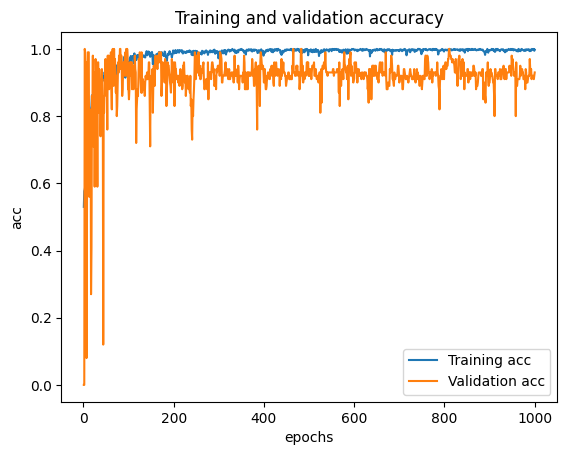

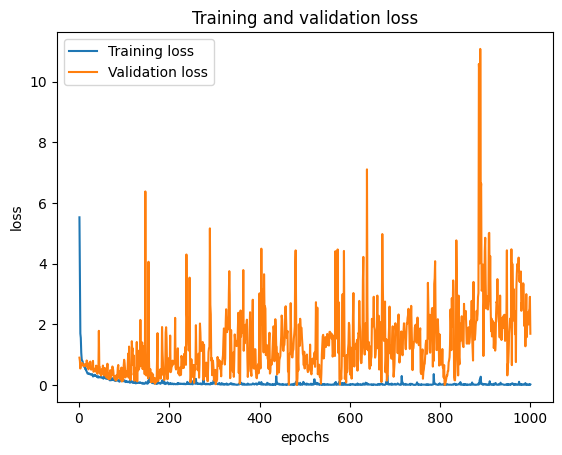

In [ ]:
plot_result(history)